#Chapter 8 - Alice and Bob
First define the projection operator for a state at angle $\theta$

In [17]:
from numpy import sin,cos,pi,sqrt,angle,exp,deg2rad,arange
import matplotlib.pyplot as plt
from qutip import *

In [7]:
%matplotlib inline

In [8]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])

In [9]:
def P(theta):
    theta_ket = cos(theta)*H + sin(theta)*V
    return theta_ket*theta_ket.dag()

Create the projection operators for each of the angles, two for Alice, two for Bob

In [10]:
Pa1 = P(deg2rad(19))
Pa2 = P(deg2rad(-35))
Pb1 = P(deg2rad(-19))
Pb2 = P(deg2rad(35))

Create the state $|\psi\rangle$:

In [11]:
psi=sqrt(0.3)*tensor(H,H) + sqrt(0.7)*tensor(V,V)

Now, find the joint probability that Alice measures A1 and Bob measures B1. We do this by finding the expectation value of the projection operator for the joint state $|\theta_{A1},\theta_{B1}\rangle$. This is formed as the tensor product of the two appropriate projection operators. In these tensor products, be sure to put Alice's operator first, then Bobs (just like we did for the signal and idler photons). Each operator acts on the photon corresponding to the order in the `tensor()` function.

In [12]:
psi.dag()*tensor(Pa1,Pb1)*psi  # joint for A1, B1 (expect 0.09)

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[ 0.16078933]]

Find the conditional probability $P(\theta_{B2}|\theta_{A1})$

In [13]:
(psi.dag()*tensor(Pa1,Pb2)*psi).data[0,0] / (psi.dag()*tensor(Pa1,qeye(2))*psi).data[0,0]  # B2 conditioned on A1 (expect 1)

(0.98404314680437843+0j)

Find the conditional probability $P(\theta_{A2}|\theta_{B1})$

In [14]:
(psi.dag()*tensor(Pa2,Pb1)*psi).data[0,0] / (psi.dag()*tensor(qeye(2),Pb1)*psi).data[0,0]  # A2 conditioned on B1 (expect 1)

(0.98404314680437843+0j)

In [15]:
(psi.dag()*tensor(Pa2,Pb2)*psi)  # joint for A2, B2 (classically expect 0.09, QM says 0)

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[ 0.00851461]]

## Explore the angles in more detail:
Why these angles, 19 and 35?

In [18]:
angles = arange(1,90,1)

In [19]:
rads = deg2rad(angles)

Make a list of the probability of joint measurements for a pair of angles:

In [20]:
out = []
for r in rads:
    out.append((psi.dag()*tensor(P(-r),P(r))*psi).data[0,0])

/Users/dawes/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


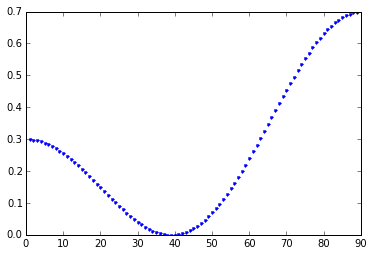

In [22]:
plt.plot(angles,out,".") # plot in units of pi

We see that the joint probabilities have a zero at 35˚. Now plug that in to one of the conditional probabilities and see what angle for the conditional probability gives 1:

In [23]:
out = []
for r in rads:
    out.append((psi.dag()*tensor(P(r),P(deg2rad(35)))*psi).data[0,0] / (psi.dag()*tensor(P(r),qeye(2))*psi).data[0,0])

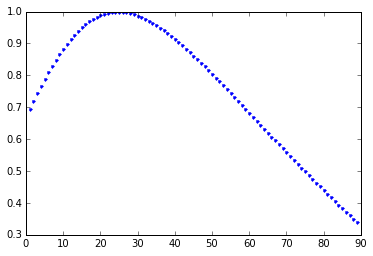

In [24]:
plt.plot(angles,out,".")

So only 19 and 35 work. Now, can you derive 19 and 35 given only the state $|\psi\rangle$?